In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import scipy
from scipy.io.idl import readsav
################################### DEFINE PARAMETERS #########################################
def ImPara(File_Name, *parameters1, **keyword): 
       if   'Flux' and 'Ra_Dec' in keyword: #Set all Flux Ra and Dec, ImPara(File Name, Flux=flux_min, Ra_Dec=[Ra1, Ra2, Dec1, Dec2])
            Flux_min=keyword['Flux']
            Ra_Dec_lim=keyword['Ra_Dec'] 
            Ra_lim=Ra_Dec_lim[:2]
            Dec_lim=Ra_Dec_lim[2:4]
            #Ra_lim=keyword['Ra']
            #Dec_lim=keyword['Dec']
            print 'Set all parameters'
            return Flux_min,Ra_lim,Dec_lim,File_Name
       elif 'Ra' and 'Dec' in keyword: #Set Ra and Dec only, ImPara(File Name, Ra=[Ra1, Ra2], Dec=[Dec1,Dec2])
            Flux_min=10
            Ra_lim=keyword['Ra'] 
            Dec_lim=keyword['Dec']
            print 'Set Ra and Dec only'
            return Flux_min,Ra_lim,Dec_lim,File_Name
       elif 'Flux' in keyword:  #Set Flux only, ImPara(Filename, Flux=flux_min)            
            Flux_min=keyword['Flux']
            Ra_lim=[-10,10]
            Dec_lim=[-10,10]
            print 'Set flux only'
            return Flux_min,Ra_lim,Dec_lim,File_Name
       else:                  #Default, only file name required, ImPara(File Name)          
            Flux_min=10
            Ra_lim=[-10,10]
            Dec_lim=[-10,10]
            print 'default'
            return Flux_min,Ra_lim,Dec_lim,File_Name
#File_name=raw_input('File Name: ') 
#File_Name='1130776864_source_array.sav'
#File_Name='1130781304_source_array.sav'
#File_Name='1130784064_source_array.sav'
#File_Name='1130788624_source_array.sav
#1130789944_source_array.sav
#1130791024_source_array
#1131454296_source_array?
#1131462216_source_array.sav
#1131473016_source_array
#1131477336_source_array
#1131478656_source_array
#1131478776_source_array
#1131534824_source_array
#1131557504_source_array
#1131568784_source_array
#1131568904_source_array
#1131709192_source_array
#1131722992_source_array
#1131741712_source_array
run='fhd_rlb_GLEAM_cal_decon_Nov2016' #Set the run

In [2]:
############################## SET THE PARAMETERS #########################################
#File_Name=raw_input('File Name (Without the extension .sav): ') 
Par_list=ImPara('1131454296_source_array.sav',Flux=1, Ra_Dec=[-5,5,-5,5])  #Set the parameters here other wise the default parameters will apply.
Flux_min=Par_list[0]  #Minimum flux
Ra_lim=Par_list[1]    #Ra limit
Dec_lim=Par_list[2]   #Dec limit
File_Name=Par_list[3] #File name

Set all parameters


In [3]:
####################### Getting Obs Id from the file name ###########################################
import os
# now you can call it directly with basename
#print(basename('1130791024_source_array.sav'))
obs_id=os.path.basename(File_Name).split('_')[0]
print 'obs_id =', obs_id

obs_id = 1131454296


In [4]:
###################### MWA data ##############################################################
data1=scipy.io.readsav(File_Name)
############### Use one of the following two depending on whether the data is a source array or a catalog #########
#data=data1.catalog        #for catalog
data=data1.source_array    #for source_array

In [5]:
############# GLEAM SOURCES ############################
data2=scipy.io.readsav('GLEAMIDR4_181_consistent.sav')
data_g=data2.catalog

In [6]:
################# Extracting Ra Dec and Flux of MWA sources #####################################
Ra_a=[]      #Ra of all MWA sources
Dec_a=[]     #Dec of all MWA sources
Flux_a=[]    # Flux of all the MWA sources
for i in data:
    Ra_a.append(i['ra'])
    Dec_a.append(i['dec'])
    Flux_a.append(i['flux']['i'][0])
Flux_Tc=[]    #Flux for compact MWA sources
Flux_Tex=[]   #Flux for extended MWA sources
Rac=[]        #Ra for compact MWA sources
Decc=[]       #Dec for compact MWA sources
for i in data:
    if i['extend']==None:
        Flux_Tc.append(i['flux']['i'][0])
        Rac.append(i['ra'])
        Decc.append(i['dec'])
    else:
        Flux_Tex.append(i['flux']['i'][0])
print len(Ra_a), len(Dec_a), len(Flux_a)
print 'min', 'Ra_a',min(Ra_a),'Dec_a', min(Dec_a),min(Rac), min(Decc)
print  'max', 'Ra_a', max(Ra_a),'Dec_a', max(Dec_a), max(Rac), max(Decc)   
print len(Flux_Tc), len(Decc), len(Rac), len(Dec_a)

7210 7210 7210
min Ra_a 8.19631e-05 Dec_a -44.8703 8.19631e-05 -44.3834
max Ra_a 359.994 Dec_a -8.54522 359.994 -9.32647
4546 4546 4546 7210


/home/champ3/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [7]:
#################### Extracting Ra and Dec and Flux of Gleam sources ###################################
Ragl=[]           #Ra for all GLEAM sources
Decgl=[]          #Dec for all GLEAM sources
Flux_Tgl=[]       #Flux for all GLEAM sources
for i in data_g:
    Ragl.append(i['ra'])
    Decgl.append(i['dec'])
    Flux_Tgl.append(i['flux']['i'][0])   
print len(Flux_Tgl)

300351


In [8]:
#GLEAM sources with in the max and min Ra and Dec of MWA compact sources.
De11=[]
Ra11=[]
Flux11=[]
Ra12=[]     #Ra for gleam sources with in the max and min Ra and Dec of MWA compact sources.
De12=[]     #Dec for gleam sources with in the max and min Ra and Dec of MWA compact sources.
Flux12=[]   #Flux for gleam sources with in the max and min Ra and Dec of MWA compact sources.
count=0
while count <len(Decgl):
    if min(Decc)<=Decgl[count]<=max(Decc):
       De11.append(Decgl[count])
       Ra11.append(Ragl[count])
       Flux11.append(Flux_Tgl[count])
       count=count+1
    else:
        count=count+1
count=0
while count <len(Ra11):
    if min(Rac)<Ra11[count]<max(Rac):
       De12.append(De11[count])
       Ra12.append(Ra11[count])
       Flux12.append(Flux11[count])
       count=count+1
    else:
        count=count+1  

########### Remove nan values from Gleam ################################
#Ra, dec and flux of gleam sources with in the max and min Ra and Dec of MWA compact sources (w/o nan values).
De=[]
Ra=[]
Flux=[]
Val_ind= [Flux12.index(value) for value in Flux12 if not math.isnan(value)]
for i in Val_ind:
    De.append(De12[i])
    Ra.append(Ra12[i])
    Flux.append(Flux12[i])   
print len(De), len(Ra), len(Flux)
print len(Flux12), len(De12), len(Ra12)
print len(Ra11), len(De11), len(Flux11)

146408 146408 146408
146408 146408 146408
146414 146414 146414


In [9]:
########################## MWA compact sources with Flux >= 1 jy. ########################
Flux_1jy=[]
De_1jy=[]
Ra_1jy=[]
count=0
while count < len(Flux_Tc):
    if Flux_Tc[count]>=1:
       Flux_1jy.append(Flux_Tc[count])
       De_1jy.append(Decc[count])
       Ra_1jy.append(Rac[count])
       count=count+1
    else:
       count=count+1
    
########## Matching MWA sources with GLEAM sources. #############################
ri_list=[]        #Indices and anglular distances for matching MWA and GLEAM sources
for i in De_1jy:       
    ri=[De_1jy.index(i)]
    count=0
    while count< len(De):
        a=(math.sin(np.radians(i)))*(math.sin(np.radians(De[count])))
        b=(math.cos(np.radians(i)))*(math.cos(np.radians(De[count])))*(math.cos(np.radians(Ra_1jy[De_1jy.index(i)]-Ra[count])))             
        ang_d=np.degrees(math.acos(a+b))
        if ang_d < 0.0333333:          
            ri.append(count)
            ri.append(ang_d)
            count=count+1            
        else:
            count=count+1
    ri_list.append(ri)
print len(ri_list)
print len(Flux_1jy), len(Ra_1jy), len(De_1jy), len(ri_list),len(ri_list)

399
399 399 399 399 399


In [10]:
r_1to1=[]    #Indices for One to one match
r_no=[]      #Indices for No-match
r_many=[]    #One to many match
Ra_2amw=[]   #Ra MWA 2arc min rad.
De_2amw=[]   #De MWA 2arc min rad.
Ra_2amg=[]   #Ra GLEAM 2arc min rad.
De_2amg=[]   #De GLEAM 2arc min rad.
Ang_dis_2am=[] #Angular distance between the sources with one to one match
Flux_r_no=[] #Flux of non matched sources
for i in ri_list:
      if len(i)==1:
            r_no.append(i)
            Flux_r_no.append(Flux_1jy[i[0]])
      elif len(i)==3:
            r_1to1.append(i)
            Ra_2amw.append(Ra_1jy[i[0]])
            Ra_2amg.append(Ra[i[1]])
            De_2amw.append(De_1jy[i[0]])
            De_2amg.append(De[i[1]])
            Ang_dis_2am.append(i[2])
      else:
            r_many.append(i)      
f1_1=[] #Flux MWA for the one to one match
f2_1=[] #Flux GLEAM for the one to one match
for i in r_1to1:
    f1_1.append(Flux_1jy[i[0]])
    f2_1.append(Flux[i[1]]) 
print len(r_no), len(r_1to1), len(r_many)
print len(f1_1), len(f2_1), len(r_no), len(r_many), len(r_1to1),len(Ang_dis_2am) 

0 399 0
399 399 0 0 399 399


In [11]:
########################## Pointing Information #####################################
import csv
Obs_id_pt = []   #Obs id from the pointing csv file
pointing1 = []   #First coordinate of the pointing
pointing2=[]     # Second coordinate of pointing
with open('diffuse_survey_pointings.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        Obs_id_pt.append(row[0])
        pointing1.append(row[1])
        pointing2.append(row[2])
        
### Looping until we get the onse id from mwa is the same as the obs id from the pointing file
pointing=[]
count=0
while count<len(Obs_id_pt): 
    if Obs_id_pt[count]==obs_id:
        pointing.append(float(pointing1[count]))
        pointing.append(float(pointing2[count]))
        count=count+1
    else:
        count=count+1  
pointing_val=(int(pointing[0]),int(pointing[1]))    # Pointing coordinates for the specified MWA obs id
print pointing_val

(0, 0)


[ 0.97652077  0.05591072]
yintercept [ 0.04947953]
gain [ 1.1206746]


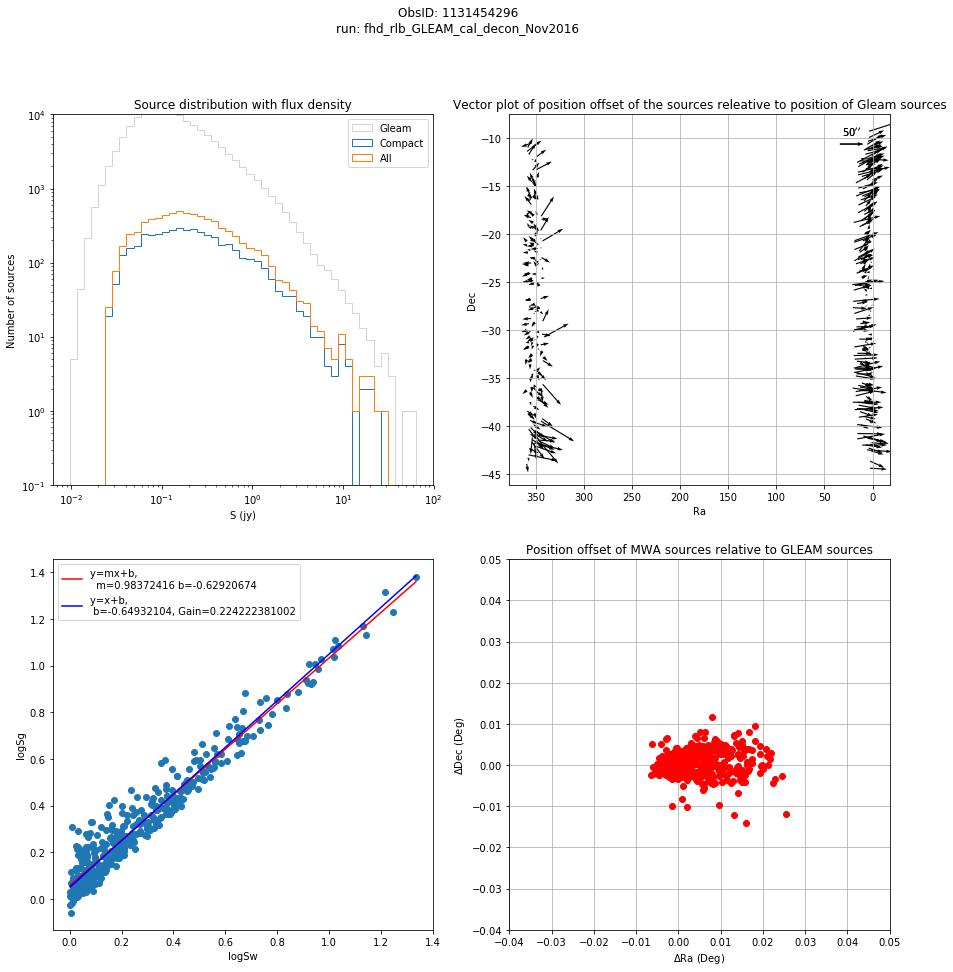

In [12]:
############  Angular distance in arc second  ##########################
As=[]
for i in Ang_dis_2am:
    b=i*3600
    As.append(b)
DRa=[i-j for i,j in zip(Ra_2amw, Ra_2amg)]
DDe=[i-j for i,j in zip(De_2amw,De_2amg)]

###################### x values for the position offset vector plot ###############################
########## For very small angular separation, \theta**2=((Ra1-Ra2)*cos(Dec1))**2 + (Dec1-Dec2)**2 
DRA2=[i*np.cos(np.radians(j)) for i,j in zip(DRa, De_2amw)]    


############ Fitting y=x+b ########################################
from scipy.optimize import curve_fit
def func(x,b):
    return x+b
popt_1, pcov_1 = curve_fit(func, np.log10(f1_1), np.log10(f2_1))


########### Fitting Polynomial with degree 1 (y=mx+b) ##############
fit_1 = np.polyfit(np.log10(f1_1),np.log10(f2_1),1)
fit_fn_1 = np.poly1d(fit_1)

########### Apply the gain from the fitting on the MWA flux #############
F_cort_1=[]         #Corrected flux for the compact MWA sources
F_cort_all_1=[]     #Corrected flux for all MWA sources
for i in Flux_Tc:
    F_cort1_1=i *10**(popt_1)
    F_cort_1.append(F_cort1_1[0])
for i in Flux_a:
    F_cort_all1_1=i*10**(popt_1)
    F_cort_all_1.append(F_cort_all1_1[0])
  
pl.figure(figsize=(15,15))
pl.subplot(221)
binsg = np.logspace(np.log10(np.min(Flux)),np.log10(np.max(Flux)), num=50)
#binsc = np.logspace(np.log10(np.min(F_cort_1)),np.log10(np.max(F_cort_1)), num=200)
#binsa = np.logspace(np.log10(np.min(F_cort_all_1)),np.log10(np.max(F_cort_all_1)), num=300)
#bins_gtest=bins = np.linspace(min(Flux), max(Flux), 5000)
3bins_ctest=bins = np.linspace(min(F_cort_1), max(F_cort_1), 1000)
#bins_atest=bins = np.linspace(min(F_cort_all_1), max(F_cort_all_1), 1000)

pl.hist(Flux, histtype='step',bins=binsg,log='T',label='Gleam', color='lightgray')
pl.hist(F_cort_1, histtype='step',bins=binsg,log='T',label='Compact')
pl.hist(F_cort_all_1, histtype='step',bins=binsg,log='T',label='All')
pl.title('Source distribution with flux density')
pl.gca().set_xscale("log")
pl.xlabel('S (jy)')
pl.ylabel('Number of sources')
pl.ylim(0.1,10000)
pl.legend()

pl.subplot(222)
fig=pl.quiver(Ra_2amw,De_2amw,DRA2,DDe,units='xy')
scalebar = pl.quiverkey(fig,0.9,0.92,0.0138889,r'50$\bf{^\prime}$$\bf{^\prime}$')
pl.xlabel('Ra')
pl.ylabel('Dec')
#pl.xlim(10,90)
#pl.ylim(-90,-10)
pl.title('Vector plot of position offset of the sources releative to position of Gleam sources')
pl.grid()
pl.gca().add_artist(scalebar)
pl.gca().invert_xaxis()
#pl.gca().set_aspect('equal',adjustable='box')


pl.subplot(223)
pl.plot(np.log10(f1_1), np.log10(f2_1),'o')
pl.plot(np.log10(f1_1),np.polyval(fit_1,np.log10(f1_1)),'r-',label='y=mx+b, \n  m=0.98372416 b=-0.62920674')
pl.plot(np.log10(f1_1), func(np.log10(f1_1), *popt_1), 'b-', label='y=x+b, \n b=-0.64932104, Gain=0.224222381002')
pl.legend()
pl.xlabel('logSw')
pl.ylabel('logSg')

pl.subplot(224)
DRaAs=[]
for i in DRa:
    DRas=i*3600
    DRaAs.append(DRas)
DDecAs=[]
for i in DDe:
    DDas=i*3600
    DDecAs.append(DDas)
pl.xlabel(r'$\Delta$Ra (Deg)')
pl.ylabel(r'$\Delta$Dec (Deg)')
pl.xlim(-0.04,0.05)
pl.ylim(-0.04,0.05)
pl.title('Position offset of MWA sources relative to GLEAM sources')
pl.plot(DRa,DDe,'ro')
pl.grid()

print fit_1
print 'yintercept', popt_1
print 'gain', 10**(popt_1)
pl.suptitle('ObsID: '+ obs_id+'\nrun: '+run)
pl.show()
#pl.savefig(obs_id)

In [61]:
#Par_list=ImPara(File_Name,Flux=1, Ra_Dec=[-5,5,-5,5])  #Set the parameters here other wise the default parameters will apply.
Flux_min=Par_list[0]
Ra_lim=Par_list[1]
Dec_lim=Par_list[2]
print Par_list
print Flux_min
print Ra_lim
print Dec_lim
print Ra_lim[0]
print Dec_lim[1]

(1, [-5, 5], [-5, 5], '1131454296_source_array.sav')
1
[-5, 5]
[-5, 5]
-5
5


In [13]:
####################### Sources in the field center ###################################

#MWA sources with in +-5deg Ra and +-5 deg Dec (with in the given limit of Ra and Dec) from the center of the FoV.
Debm11=[]
Rabm11=[]
Fluxbm11=[]
Rabm=[]     #Ra of compact sources with in the given limit of Ra and Dec from the center of the field of view.
Debm=[]     #Dec of compact sources with in the given limit of Ra and Dec from the center of the field of view.
Fluxbm=[]   #Flux of compact sources with in the given limit of Ra and Dec from the center of the field of view.      

beam_cent=[] #Ra and Dec of the beam ceneter.
with open('sidelobe_survey_obsinfo.txt') as infile:
    for line in infile:
        beam_cent.append(line.split(','))
count=0
while count<len(beam_cent):
    if beam_cent[count][0]==obs_id:
        Ra_cent=beam_cent[count][2]
        Dec_cent=beam_cent[count][3]
        count=count+1
    else:
        count=count+1        
Ra_center=float(Ra_cent) 
Dec_center=float(Dec_cent)

count=0
while count <len(Decc):
    if (Dec_center + Dec_lim[0])<Decc[count]<(Dec_center + Dec_lim[1]):
       Debm11.append(Decc[count])
       Rabm11.append(Rac[count])
       Fluxbm11.append(Flux_Tc[count])
       count=count+1
    else:
        count=count+1        
count=0
while count <len(Rabm11):
    if (Ra_center + Ra_lim[0])<Rabm11[count]<(Ra_center + Ra_lim[1]):
       Debm.append(Debm11[count])
       Rabm.append(Rabm11[count])
       Fluxbm.append(Fluxbm11[count])
       count=count+1
    else:
        count=count+1  

        
################# All MAWA sources with in the center of the FoV ################################ 
Debm11_all=[]
Rabm11_all=[]      #Ra for all sources within the given limit of Ra and Dec from the center of the field of view.
Fluxbm11_all=[]
Rabm_all=[]
Debm_all=[]        #Dec for all sources within the given limit of Ra and Dec from the center of the field of view.
Fluxbm_all=[]   #Flux of all sources within the given limit of Ra and Dec from the center of the field of view.
count=0
while count <len(Dec_a):
    if (Dec_center + Dec_lim[0])<Dec_a[count]<(Dec_center + Dec_lim[1]):
       Debm11_all.append(Dec_a[count])
       Rabm11_all.append(Ra_a[count])
       Fluxbm11_all.append(Flux_a[count])
       count=count+1
    else:
        count=count+1
count=0
while count <len(Rabm11_all):
    if (Ra_center + Ra_lim[0])<Rabm11_all[count]<(Ra_center + Ra_lim[1]):
       Debm_all.append(Debm11_all[count])
       Rabm_all.append(Rabm11_all[count])
       Fluxbm_all.append(Fluxbm11_all[count])
       count=count+1
    else:
        count=count+1   
print len(Rabm), len(Debm), len(Fluxbm)
print len(Fluxbm),len(Fluxbm_all), len(Debm_all), len(Rabm_all)
print len(Flux_Tc), len(Flux_a), len(Dec_a), len(Ra_a)

458 458 458
458 693 693 693
4546 7210 7210 7210


In [14]:
############# GLEAM sources within the given limit of Ra and Dec from the center of MWA field of view. #########
Debm11_gl=[]
Rabm11_gl=[]
Fluxbm11_gl=[]
Rabm_gl=[]        #Ra of GLEAM sources within the given limit of Ra and Dec from MWA beam center
Debm_gl=[]        #Dec of GLEAM sources within the given limit of Ra and Dec from MWA beam center
Fluxbm_gl=[]      #Flux of gleam source within the given limit of Ra and Dec from MWA beam center
count=0
while count <len(De):
    if (Dec_center + Dec_lim[0])<=De[count]<=(Dec_center + Dec_lim[1]):
       Debm11_gl.append(De[count])
       Rabm11_gl.append(Ra[count])
       Fluxbm11_gl.append(Flux[count])
       count=count+1
    else:
        count=count+1
count=0
while count <len(Rabm11_gl):
    if (Ra_center + Ra_lim[0])<Rabm11_gl[count]<=(Ra_center + Ra_lim[1]):
       Debm_gl.append(Debm11_gl[count])
       Rabm_gl.append(Rabm11_gl[count])
       Fluxbm_gl.append(Fluxbm11_gl[count])
       count=count+1
    else:
        count=count+1  
print len(Rabm_gl), len(Debm_gl), len(Fluxbm_gl)       

1004 1004 1004


In [15]:
#MWA sources with flux >= Flux_min in the beam center, which will be used to fit the logSw-logSg plot
Flux_5jy=[]   #MWA sources with flux >= Flux_min and with in the given Ra and Dec lim.
De_5jy=[]
Ra_5jy=[]
De_all=[]
Ra_all=[]
Flux_all=[]  #Flux of MWA sources with in the ra and dec lim.
count=0
while count < len(Fluxbm):
    if Fluxbm[count]>=Flux_min:
       Flux_5jy.append(Fluxbm[count])
       De_5jy.append(Debm[count])
       Ra_5jy.append(Rabm[count])
       Flux_all.append(Fluxbm[count])
       De_all.append(Debm[count])
       Ra_all.append(Rabm[count])
       count=count+1
    else:
       Flux_all.append(Fluxbm[count])
       De_all.append(Debm[count])
       Ra_all.append(Rabm[count])
       count=count+1
Ang_dis_5=[]
ri_list_5=[]
for i in De_5jy:       
    ri_5=[De_5jy.index(i)]
    count=0
    while count< len(De):
        a=(math.sin(np.radians(i)))*(math.sin(np.radians(De[count])))
        b=(math.cos(np.radians(i)))*(math.cos(np.radians(De[count])))*(math.cos(np.radians(Ra_5jy[De_5jy.index(i)]-Ra[count])))             
        ang_d=np.degrees(math.acos(a+b))
        if ang_d < 0.0333333:          
            ri_5.append(count)
            ri_5.append(ang_d)
            count=count+1
        else:
            count=count+1
        Ang_dis_5.append(ang_d)
    ri_list_5.append(ri_5)
print len(ri_list_5)

23


In [16]:
################## Indices for MWA vs Gleam Match (in the center of FoV) ########################################
r_1to1_5=[]
r_no_5=[]
Flux_r_no_5=[] #Flux of sources that do not have match
r_many_5=[]
Ra_2amw_5=[]
De_2amw_5=[]
Ra_2amg_5=[]
De_2amg_5=[]
Ang_dis_2am_5=[]
for i in ri_list_5:
      if len(i)==1:
            r_no_5.append(i)
            Flux_r_no_5.append(Flux_5jy[i[0]])
      elif len(i)==3:
            r_1to1_5.append(i)
            Ra_2amw_5.append(Ra_5jy[i[0]])
            Ra_2amg_5.append(Ra[i[1]])
            De_2amw_5.append(De_5jy[i[0]])
            De_2amg_5.append(De[i[1]])
            Ang_dis_2am_5.append(i[2])
      else:
           r_many_5.append(i)
print len(r_1to1_5), len(r_no_5), len(r_many_5)           

23 0 0


In [17]:
#################### Flux of MWA and GLEM sources with 1to1 match in the central field of view #################
f1_5=[]      #Flux for MWA  (within the center of FoV, flux>=Flux_lim, 1to1 match)
f2_5=[]      #Flux for gleam (within the center of FoV, flux>=Flux_lim, 1to1 match)
for i in r_1to1_5:
    f1_5.append(Flux_5jy[i[0]])
    f2_5.append(Flux[i[1]])
        
    
################## x and y coordinates for the vector plot of the position offsets ################    
DRa=[i-j for i,j in zip(Ra_2amw, Ra_2amg)]
DDe=[i-j for i,j in zip(De_2amw,De_2amg)]
DRA2=[i*np.cos(np.radians(j)) for i,j in zip(DRa, De_2amw)]

print len(f1_5), len(f2_5)

23 23


In [18]:
########### Flux of MWA sources after applying the gain obtained from logSw-logSg fit #####################
F_cort_1=[]        #Corrected flux for all compact MWA sources
F_cort_all_1=[]    #Corrected flux for all MWA sources
F_cort_r_no=[]     #Corrected flux for compact MWA sources that do not have matches with Gleam
F_cort_r_no_5=[]   #Corrected flux for compact MWA sources in the center of the FoV that donot have match with Gleam
for i in Flux_Tc:
    F_cort1_1=i*10**(popt_1)
    F_cort_1.append(F_cort1_1[0])
for i in Flux_a:
    F_cort_all1_1=i*10**(popt_1)
    F_cort_all_1.append(F_cort_all1_1[0]) 
for i in Flux_r_no:
    F_cort_r_no_1=i*10**(popt_1)
    F_cort_r_no.append(F_cort_r_no_1[0]) 
for i in Flux_r_no_5:
    F_cort_r_no_1_5=i*10**(popt_1)
    F_cort_r_no_5.append(F_cort_r_no_1_5[0])  

################ Fitting y=x+b line to the logS-logS plot (1to1 match and in the center of FoV) ###################
def func(x,b):
    return x+b
popt, pcov = curve_fit(func, np.log10(f1_5), np.log10(f2_5))   

################ Fitting polynomial function degree 1 (y=mx+b) to the logS-logS plot (1to1 match and in the center of FoV) ###################
fit = np.polyfit(np.log10(f1_5),np.log10(f2_5),1)
fit_fn = np.poly1d(fit) 

############### Apply the gain from y=x+b fit on the MWA flux ################# 
F_cort=[]       #Corrected flux for compact MWA sources in the center of the FoV
F_cort_all=[]   #Corrected flux for all MWA sources in the center of the FoV
for i in Fluxbm:
    F_cort1=i*10**(popt)
    F_cort.append(F_cort1[0])
for i in Fluxbm_all:
    F_cort_all1=i*10**(popt)
    F_cort_all.append(F_cort_all1[0])    
    
############# Remove nan values for flux of Gleam sources  ##############   
Fg_nan_bm= [value for value in Fluxbm_gl if not math.isnan(value)]  #(in the center of FoV)
Fg_nan= [value for value in Flux_Tgl if not math.isnan(value)]      #(For all Gleam sources)

############## Measure of scatter of the sources ################################
Scat_f2_5_F_cort=(np.sum([(i-j)**2 for i,j in zip(f2_5,F_cort)]))/len(f2_5)

################## Faintest bin wit MWA source number >=0.5*Number of sources in the highest bin ################
his_val=np.histogram(F_cort, bins=binsg)
his_val_05=[]
bin_val_05=[]
count=0
while count < len(his_val[0]):
    if his_val[0][count] >=0.5*max(his_val[0]):
        his_val_05.append(his_val[0][count])
        bin_val_05.append(his_val[1][count])
        count=count+1
    else:
        count=count+1
bin_val_list=his_val[1].tolist()      #change to list  
bin_ind=bin_val_list.index(min(bin_val_05)) +1   
bin_faint=[round(min(bin_val_05),3),round(bin_val_list[bin_ind],3)] 

################ Number of MWA sources in the center of the FoV for different flux limit ####################
F_cort_1jy=[]  #No of sources with flux >1jy in the field center 
F_cort_80_120=[] #No of sources with 100mjy<flux <110mJy in the field center
count=0
while count <len(F_cort):
    if F_cort[count]>=1:
        F_cort_1jy.append(F_cort[count])
        count=count+1
    elif 0.08<=F_cort[count]<=0.12:
        F_cort_80_120.append(F_cort[count])
        count=count+1   
    else:
        count=count+1 
print fit, popt
print Scat_f2_5_F_cort

for i in Ra_2amw:
    if i>180:
        Ra_2amw[Ra_2amw.index(i)]=Ra_2amw[Ra_2amw.index(i)]-360
    else:   
        Ra_2amw[Ra_2amw.index(i)]=Ra_2amw[Ra_2amw.index(i)] 
for j in De_2amw:
    if j>180:
        De_2amw[De_2amw.index(j)]=De_2amw[De_2amw.index(j)]-360
    else:   
        De_2amw[De_2amw.index(j)]=De_2amw[De_2amw.index(j)]  
print len(Fluxbm), len(F_cort),  len(F_cort_1jy), len(F_cort_80_120)      

[ 0.97990644  0.00395915] [-0.00125679]
0.0206213824147
458 458 23 60


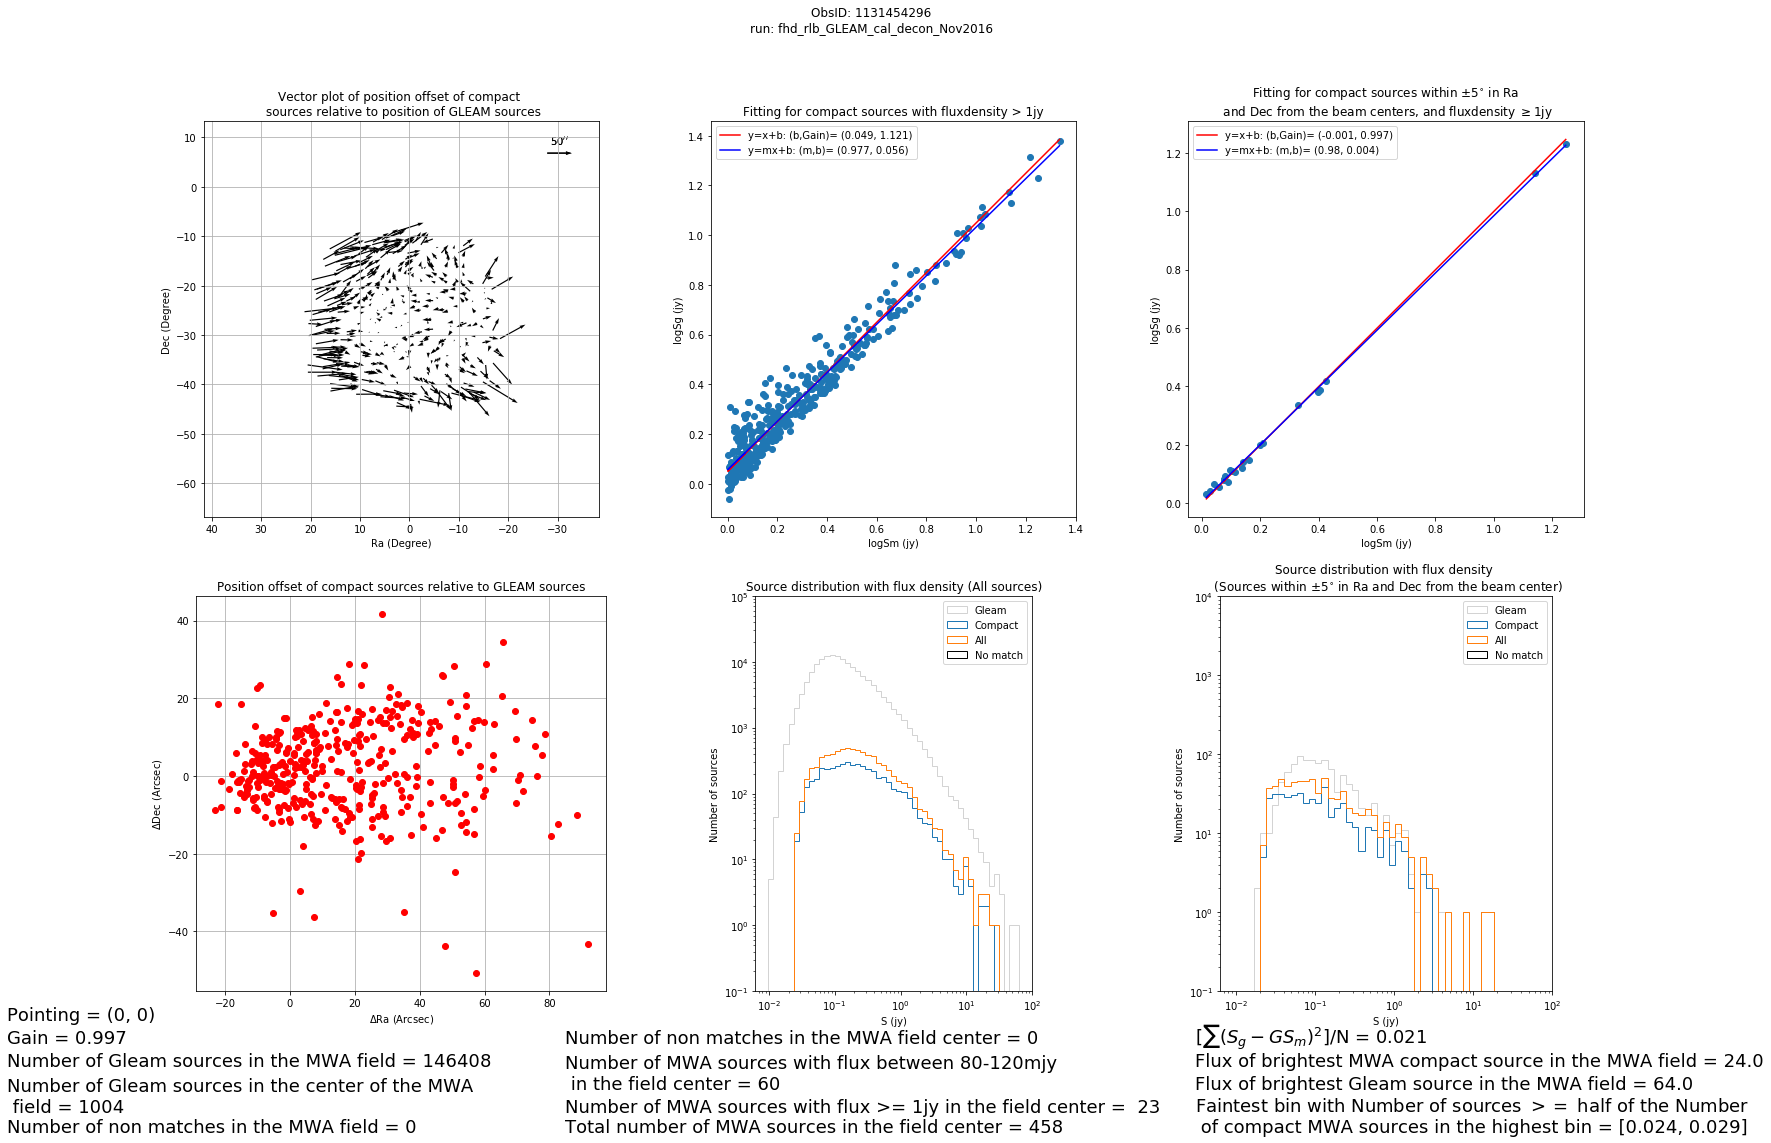

0.997


In [19]:
########################## Plot ##############################################
figure=pl.figure(figsize=(25,16))
pl.subplot(235)
pl.hist(Flux, histtype='step',bins=binsg,log='T',label='Gleam', color='lightgray')
pl.hist(F_cort_1, histtype='step',bins=binsg,log='T',label='Compact')
pl.hist(F_cort_all_1, histtype='step',bins=binsg,log='T',label='All')
pl.hist(F_cort_r_no, histtype='step',bins=binsg,log='T',label='No match',color='black')
pl.title('Source distribution with flux density (All sources)')
pl.gca().set_xscale("log")
pl.xlabel('S (jy)')
pl.ylabel('Number of sources')
pl.ylim(0.1,100000)
pl.legend()
pl.gca().set_aspect('equal',adjustable='box') #Equal x and y scal


pl.subplot(236) #Hist for sources in the central FoV
pl.hist(Fluxbm_gl, histtype='step',bins=binsg,log='T',label='Gleam', color='lightgray')
pl.hist(F_cort, histtype='step',bins=binsg,log='T',label='Compact')
pl.hist(F_cort_all, histtype='step',bins=binsg,log='T',label='All')
pl.hist(F_cort_r_no_5, histtype='step',bins=binsg,log='T',label='No match',color='black')
pl.title('Source distribution with flux density \n (Sources within $\pm$'+str(Ra_lim[1])+'$^{\circ}$'+' in Ra and Dec from the beam center) ')
pl.title('Source distribution with flux density \n (Sources within $\pm5^{\circ}$ in Ra and Dec from the beam center)')


pl.gca().set_xscale("log")
pl.xlabel('S (jy)')
pl.ylabel('Number of sources')
pl.ylim(0.1,10000)
pl.legend()
pl.gca().set_aspect('equal',adjustable='box') #Equal x and y scale


pl.subplot(231)
fig=pl.quiver(Ra_2amw,De_2amw,DRA2,DDe,units='xy')
scalebar = pl.quiverkey(fig,0.9,0.92,0.0138889,r'50$\bf{^\prime}$$\bf{^\prime}$')
pl.xlabel('Ra (Degree)')
pl.ylabel('Dec (Degree)')
pl.title('Vector plot of position offset of compact \n sources relative to position of GLEAM sources')
Ra_limit=[Ra_center-40,Ra_center+40]
Dec_limit=[Dec_center-40,Dec_center+40]
pl.xlim(Ra_limit[0],Ra_limit[1])
pl.ylim(Dec_limit[0],Dec_limit[1])
pl.grid()
pl.gca().add_artist(scalebar)
pl.gca().invert_xaxis()
pl.gca().set_aspect('equal',adjustable='box') #Equal x and y scale

pl.subplot(232)              #For the whole MWA FoV
gain_1=round(10**(popt_1),3) # Gain from y=x+b fit for the compact sources in the whole MWA FoV
intercept_1=round(popt_1,3)  # Intercept from y=x+b fit for the compact sources in the whole MWA FoV
lab_1=(intercept_1, gain_1)
pl.plot(np.log10(f1_1), np.log10(f2_1),'o')
pl.plot(np.log10(f1_1), func(np.log10(f1_1), *popt_1), 'r-', label='y=x+b: (b,Gain)= {}'.format(lab_1))
lab2_1=(round(fit_1[0],3),round(fit_1[1],3))# Slope and intercept from y=mx+b fit for the compact sources in the whole MWA FoV
pl.plot(np.log10(f1_1),np.polyval(fit_1,np.log10(f1_1)),'b-',label='y=mx+b: (m,b)= {}'.format(lab2_1))
pl.title('Fitting for compact sources with fluxdensity > 1jy')
pl.legend()
pl.xlabel('logSm (jy)')
pl.ylabel('logSg (jy)')
pl.gca().set_aspect('equal',adjustable='box') #Equal x and y scale

pl.subplot(233)           #For the center of MWA FoV
pl.plot(np.log10(f1_5), np.log10(f2_5),'o')
gain=round(10**(popt),3)   # Gain from y=x+b fit for the compact sources in the center of  MWA FoV
intercept=round(popt,3)    # Intercept from y=x+b fit for the compact sources in the center of  MWA FoV
lab=(intercept, gain)
pl.plot(np.log10(f1_5), func(np.log10(f1_5), *popt), 'r-',label='y=x+b: (b,Gain)= {}'.format(lab))
lab2=(round(fit[0],3),round(fit[1],3))# Slope and intercept from y=mx+b fit for the compact sources in the center of  MWA FoV
pl.plot(np.log10(f1_5),np.polyval(fit,np.log10(f1_5)),'b-',label='y=mx+b: (m,b)= {}'.format(lab2))
pl.title('Fitting for compact sources within $\pm$'+ str(Dec_lim[1])+'$^{\circ}$ in Ra \n and Dec from the beam centers, and fluxdensity $\geq$'+str(Flux_min)+'jy')
pl.legend()
pl.xlabel('logSm (jy)')
pl.ylabel('logSg (jy)')
pl.gca().set_aspect('equal',adjustable='box') #Equal x and y scale

pl.subplot(234)
DRaAs=[]
for i in DRa:
    DRas=i*3600
    DRaAs.append(DRas)
DDecAs=[]
for i in DDe:
    DDas=i*3600
    DDecAs.append(DDas)
pl.xlabel(r'$\Delta$Ra (Arcsec)')
pl.ylabel(r'$\Delta$Dec (Arcsec)')
pl.title('Position offset of compact sources relative to GLEAM sources')
pl.plot(DRaAs,DDecAs,'ro')
pl.grid()
#pl.gca().set_aspect('equal',adjustable='box') #Equal x and y scale
pl.suptitle('ObsID: '+ obs_id+'\nrun: '+run)

#pl.subplots_adjust(wspace=0.2, hspace=0.02)


figure.text(0.68,0.003, 'Faintest bin with Number of sources $>=$ half of the Number \n of compact MWA sources in the highest bin = {}'.format(bin_faint),size=18)
figure.text(0.68,0.04, 'Flux of brightest Gleam source in the MWA field = {}'.format(round(max(Flux)),3),size=18)
#figure.text(0.68,0.06, 'Flux of brightest MWA source in the field = {}'.format(round(max(Flux_a)),3),size=18)
figure.text(0.68,0.06, 'Flux of brightest MWA compact source in the MWA field = {}'.format(round(max(F_cort_1)),3),size=18)
figure.text(0.68,0.08, '[$\sum (S_g - GS_m)^2$]/N = {}'.format(round(Scat_f2_5_F_cort,3)),size=18)

figure.text(0.02,0.10, 'Pointing = {}'.format(pointing_val),size=18)
figure.text(0.02,0.08, 'Gain = {}'.format(round(gain,3)),size=18)

figure.text(0.33,0.003, 'Total number of MWA sources in the field center = {}'.format(len(Fluxbm)),size=18)
figure.text(0.33,0.02,  'Number of MWA sources with flux >= 1jy in the field center =  {}'.format(len(F_cort_1jy)),size=18)
figure.text(0.33,0.04, 'Number of MWA sources with flux between 80-120mjy \n in the field center = {}'.format(len(F_cort_80_120)),size=18)
figure.text(0.33,0.08, 'Number of non matches in the MWA field center = {}'.format(len(r_no_5)),size=18)

figure.text(0.02,0.06, 'Number of Gleam sources in the MWA field = {}'.format(len(Flux)),size=18)
figure.text(0.02,0.02, 'Number of Gleam sources in the center of the MWA \n field = {}'.format(len(Fluxbm_gl)),size=18)
figure.text(0.02,0.003, 'Number of non matches in the MWA field = {}'.format(len(r_no)),size=18)
pl.show()
#pl.savefig(obs_id+run+'last_1')
#bin_widths = binsg[1:]-binsg[0:-1]
#print "Bin widths:"
#print bin_widths
print gain